Drew Grant

2/18/2020

DiCOVA: MFCC, Short Term Spectral Energy Density, ZCRs, LPCs and PLPs were extracted 



In [1]:
# !cat /proc/cpuinfo

In [2]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 5.6MB/s 


In [3]:
pip install imbalanced-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random as rnd
import torch
import pandas as pd
from scipy import stats as st
import sklearn.linear_model as lm
import seaborn as sn
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
from scipy import signal
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from skmultilearn.model_selection import IterativeStratification
import time
from sklearn.impute import SimpleImputer
from scipy import interp
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import warnings
import scipy.io as sio
from google.colab import drive
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.decomposition import PCA as PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib.ticker import MaxNLocator
iteration = 0 #used to save all the ml runs  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from django.contrib.admin.utils import flatten

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [6]:
warnings.filterwarnings("ignore")

In [7]:
def flatten_data(data):
  new_data =  np.zeros(len(data)).astype(int)
  for i in range (0, len(l)):
    new_data[i] = int(data[i][0][0])
  # print('Old Data Values 0:10:', data[:10])
  # print('New Data Values 0:10:', new_data[:10])
  return new_data  

In [8]:
 # TAKE N SAMPLES OF THE RECORDING
def sample_extractor(f, samples_needed):
  pads = 0 # will report how many data rows needed to be zero padded 
  data = np.asarray(f)
  new_data = np.zeros((data.shape[0], samples_needed))
  for i in range (0, len(new_data)):
    lengths = f[i].T.shape[0]
    data_i = data[i].T
    data_i = data_i.flatten()
    if len(data_i)<samples_needed: #Zero Padding is necessary 
      padded = np.zeros(samples_needed)
      padded[:len(data_i)] = data_i
      new_data[i] = padded
      pads += 1
    else: 
      new_data[i] = (data_i[:samples_needed])
  print(pads, 'data rows were padded')
  return new_data

In [9]:
def conmat(truths, preds, time0 = 0 , name=" "):
  confusion_matrix = pd.crosstab(np.ravel(truths), np.ravel(preds), rownames=['Actual'], colnames=['Predicted'])
  sn.heatmap(confusion_matrix, annot=True, fmt='d')
  t = ["Confusion", "Matrix"]
  sep = " "
  t = t + list(name.split(" "))
  plt.title(sep.join(t))
  plt.show()
  print('Average fit time:', np.average(time0), 'secs')

In [10]:
pip install hdf5storage

     |████████████████████████████████| 61kB 5.7MB/s 


In [11]:
import hdf5storage


Declare functions

In [12]:
def load_names(file_name):
  mat_file = '/content/gdrive/My Drive/research/Data_Cough_Sounds/' 
  mat_file = mat_file + file_name
  mat = hdf5storage.loadmat(mat_file)
  data = mat['featurecell']
  n = data[:, 3]
  return n

In [13]:
fold = 0
var_name = 'features_train' + str(fold)
var_name

'features_train0'

In [14]:
def load_data(file_name, samples_needed = 27530, train0_test1 = 0, fold = 0):
  mat_file = '/content/gdrive/My Drive/research/Data_Cough_Sounds/' 
  mat_file = mat_file + file_name
  mat = hdf5storage.loadmat(mat_file)
  if train0_test1 == 0:
    var_name = 'features_train' + str(fold)
  else:
    var_name = 'features_val' + str(fold)
  data = mat[var_name]
  f = data[:,0]
  l = data[:,1]
  c = data[:,2]

  labels = np.zeros(len(l)-1)
  for i in range (0, len(l)-1):
    if l[i][0][0].tolist() == 0:
      labels[i] == int(0)
    elif l[i][0][0].tolist() == 1:
      labels[i] = int(1)
    elif l[i][0][0].tolist() == 2:
      labels[i] = int(2)

  c = c[:-1]
  f = f[:-1]

  covid = np.zeros(len(c))
  for i in range (0, len(c)):
    if c[i][0][0].tolist() == 0:
      covid[i] == int(0)
    elif c[i][0][0].tolist() == 1:
      covid[i] = int(1)
    elif c[i][0][0].tolist() == 2:
      covid[i] = int(2)
  covid.shape

  print('Sound Event Labels shape: ', labels.shape)
  print('Features shape: ', f.shape)
  print('COVID Labels shape: ', covid.shape)

  zees = 0
  ones = 0
  twos = 0
  threes = 0
  for i in range (0, len(labels)):
    if labels[i] == 0:
      zees += 1
    elif labels[i] == 1:
      ones += 1
    elif labels[i] == 2:
      twos += 1
    elif labels[i] == 3:
      threes  += 1

  print('Talking samples:', zees)
  print('Coughing samples:', ones)
  print('Breathing samples:', twos)
  print('Neither samples:', threes)
  ax = plt.figure().gca();
  ax.xaxis.set_major_locator(MaxNLocator(integer=True));
  ax.yaxis.set_major_locator(MaxNLocator(integer=True));
  ax.hist(labels);
  plt.title('Sound Event Histogram');
  plt.ylabel('Frequency');
  plt.xlabel('Label');
  plt.xticks(np.arange(4), ['Speech', 'Cough', 'Breathing', 'Neither']);
  plt.show()

  negs = 0
  pos = 0
  rec = 0
  for i in range (0, len(covid)):
    if covid[i] == 0:
      negs += 1
    elif covid[i] == 1:
      pos += 1
    elif covid[i] == 2:
      rec += 1

  print('Negative samples:', negs)
  print('Positives samples:', pos)
  print('Recovered samples', rec)
  ax = plt.figure().gca();
  ax.xaxis.set_major_locator(MaxNLocator(integer=True));
  ax.yaxis.set_major_locator(MaxNLocator(integer=True));
  ax.hist(covid);
  plt.title('COVID Statuses');
  plt.ylabel('Frequency');
  plt.xlabel('Diagnosis');
  plt.show()

  lengths = np.zeros(len(f))
  for i in range (0, len(f)):
    lengths[i] = f[i].shape[1]
  ax = plt.figure().gca();
  ax.xaxis.set_major_locator(MaxNLocator(integer=True));
  ax.yaxis.set_major_locator(MaxNLocator(integer=True));
  ax.hist(lengths);
  plt.title('Feature Lengths');
  plt.ylabel('Frequency');
  plt.xlabel('Length');
  plt.show()

  features = sample_extractor(f, samples_needed)
  imp = SimpleImputer(strategy="most_frequent")
  scaler = StandardScaler()
  features = imp.fit_transform(features)
  scaler.fit(features)
  features = preprocessing.scale(features)

  return features, covid, labels

In [15]:
def one_class(soundnum, X, y, labels):
  sound = np.where(labels == soundnum)
  X = X[sound]
  y = y[sound]
  return X, y

In [16]:
def sampler(X1, y1, oversample, undersample_num = 1000, over_rate = 0.5):
################### Undersampling #####################################
  negatives = np.argwhere(y1 == 0)
  neglen = negatives.shape[0]
  positives = np.argwhere(y1 == 1)
  import random
  random.seed(1)
  k = []
  for m in range (0, undersample_num):
    k.append(random.choice([i for i in negatives if i != np.any(positives)]))
  flat_list = [item for sublist in k for item in sublist]
  y_over = np.concatenate((np.reshape(y1[flat_list],(len(y1[flat_list]), -1)), y1[positives]))
  X_over = np.concatenate((X1[flat_list], X1[positives.flatten()]), axis=0)

  X1 = X_over
  y1 = y_over

  negs = 0
  pos = 0
  for i in range (0, len(y1)):
    if y1[i] == 0:
      negs += 1
    elif y1[i] == 1:
      pos += 1

## Undersampling Rate
  print('Undersampling')
  print('Negative samples:', negs)
  print('Positives samples:', pos)

  if oversample == 1:
################## Oversampling ####################################
    oversample = SMOTE(sampling_strategy= over_rate)
    X2, y2 = oversample.fit_resample(X1, y1)
    print('X1 and y1 shapes:')
    print(X1.shape, y1.shape)
    print('X2 and y2 shapes:')
    print(X2.shape, y2.shape)

    negs = 0
    pos = 0
    for i in range (0, len(y2)):
      if y2[i] == 0:
        negs += 1
      elif y2[i] == 1:
        pos += 1

    ## Oversampling Rate
    print('Oversampling')
    print('Negative samples:', negs)
    print('Positives samples:', pos)
    X1 = X2
    y1 = y2
  else:
    print('No Oversampling') 

  return X1, y1

In [17]:
def CVal(classifier, name, X, y, show_plots=0, folds = 5):
  time0 = np.zeros(folds)
  k_fold = IterativeStratification(n_splits=folds, order=1)
  fold_num = 1
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  acc = np.zeros(folds)
  for train, test in k_fold.split(X, y):
      ######### FIT ##################
      start_time = time.time()
      classifier.fit(X[train], y[train])
      end_time = time.time()
      time0[fold_num-1] = end_time-start_time
      print(np.round(time0[fold_num-1], 2), 'secs to fit', name)
      ######################################
      result = classifier.predict(X[test])
      print('############## Fold', fold_num, '##############' )
      for i in range(len(result)):
        truth = y[test]
        if truth[i] == result[i]:
          correct += 1
      print('Correct Predictions:', correct)
      print('Total Labels to Predict:', len(result))
      acc[fold_num - 1] = correct/len(result)
      correct = 0
      fold_num += 1

      if show_plots==1:
        confusion_matrix = pd.crosstab(np.ravel(y[test]), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
        sn.heatmap(confusion_matrix, annot=True, fmt='d')
        plt.show()

      all_truths = np.append(all_truths, truth)
      # print("All truths:", all_truths.shape)
      all_results = np.append(all_results, result)
      # print("All results:", all_results.shape)
      yhat = classifier.predict_proba(X[test])
      pos_probs= np.append(pos_probs, yhat[:, 1])
      all_testlabels = np.append(all_testlabels, y[test])
  return all_truths, all_results, time0

In [18]:
def celebLDA(classifier, Xtrain, ytrain, Xtest, ytest, show_plots=0):
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  ######### FIT ##################
  lda = LDA(n_components=2)
  start_time = time.time()
  Xtrain = lda.fit_transform(Xtrain, ytrain)
  classifier.fit(Xtrain, ytrain)
  end_time = time.time()
  time0 = end_time-start_time
  print(np.round(time0, 2), 'secs to fit')
  ######################################
  Xtest = lda.transform(Xtest)
  result = classifier.predict(Xtest)
  for i in range(len(result)):
    truth = ytest
    if truth[i] == result[i]:
      correct += 1
  print('Correct Predictions:', correct)
  print('Total Labels to Predict:', len(result))
  acc = correct/len(result)
  correct = 0

  if show_plots==1:
    confusion_matrix = pd.crosstab(np.ravel(ytest), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.show()

  all_truths = np.append(all_truths, truth)
  all_results = np.append(all_results, result)
  all_testlabels = np.append(all_testlabels, ytest)
  return all_truths, all_results, time0

In [19]:
def celebPCALDA(classifier, Xtrain, ytrain, Xtest, ytest, show_plots=0):
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  ########## FIT ##################
  pca = PCA(n_components=2, svd_solver='full')
  lda = LDA(n_components=2)
  start_time = time.time()
  X = pca.fit_transform(Xtrain, ytrain)
  Xtrain = lda.fit_transform(X, ytrain)
  classifier.fit(Xtrain, ytrain)
  end_time = time.time()
  time0 = end_time-start_time
  print(np.round(time0, 2), 'secs to fit')
  ######################################
  X = pca.fit_transform(Xtest, ytest)
  Xtest = lda.transform(X)
  result = classifier.predict(Xtest)
  for i in range(len(result)):
    truth = ytest
    if truth[i] == result[i]:
      correct += 1
  print('Correct Predictions:', correct)
  print('Total Labels to Predict:', len(result))
  acc = correct/len(result)
  correct = 0

  if show_plots==1:
    confusion_matrix = pd.crosstab(np.ravel(ytest), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.show()

  all_truths = np.append(all_truths, truth)
  all_results = np.append(all_results, result)
  all_testlabels = np.append(all_testlabels, ytest)
  return all_truths, all_results, time0

In [20]:
def celeb(classifier, Xtrain, ytrain, Xtest, ytest, show_plots=0):
  correct = 0
  all_truths = np.array([])
  all_results = np.array([])
  all_testlabels = np.array([])
  pos_probs = np.array([])
  ######### FIT ##################
  start_time = time.time()
  classifier.fit(Xtrain, ytrain)
  end_time = time.time()
  time0 = end_time-start_time
  print(np.round(time0, 2), 'secs to fit')
  ######################################
  result = classifier.predict(Xtest)
  for i in range(len(result)):
    truth = ytest
    if truth[i] == result[i]:
      correct += 1
  print('Correct Predictions:', correct)
  print('Total Labels to Predict:', len(result))
  acc = correct/len(result)
  correct = 0

  if show_plots==1:
    confusion_matrix = pd.crosstab(np.ravel(ytest), np.ravel(result), rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.show()

  all_truths = np.append(all_truths, truth)
  all_results = np.append(all_results, result)
  all_testlabels = np.append(all_testlabels, ytest)
  return all_truths, all_results, time0

In [21]:
def quickclass(X_train, X_test, y_train, y_test, clf):
  start_time = time.time()
  eval(clf).fit(X_train, y_train)
  end_time = time.time()
  time0 = end_time-start_time
  preds = eval(clf).predict(X_test)
  return y_test.flatten(), preds, time0

Declare variables

Sound Event Labels shape:  (820,)
Features shape:  (820,)
COVID Labels shape:  (820,)
Talking samples: 0
Coughing samples: 820
Breathing samples: 0
Neither samples: 0


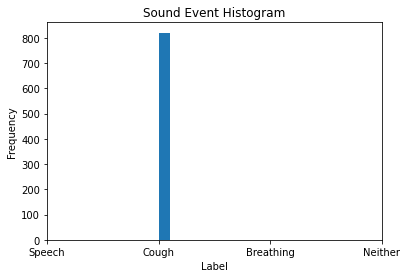

Negative samples: 770
Positives samples: 50
Recovered samples 0


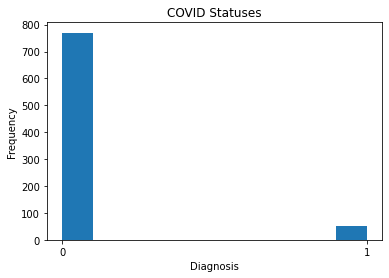

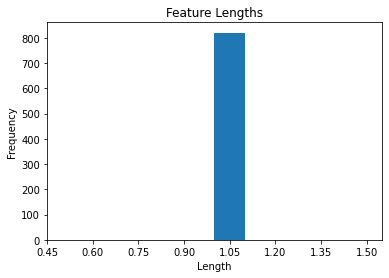

782 data rows were padded


In [64]:
trainfeatures, traincovidlabels, trainsoundlabels = load_data(file_name = 'DiCOVA/train1_baseline_features.mat', samples_needed = 5000, train0_test1 = 0, fold = 1)

Sound Event Labels shape:  (216,)
Features shape:  (216,)
COVID Labels shape:  (216,)
Talking samples: 0
Coughing samples: 216
Breathing samples: 0
Neither samples: 0


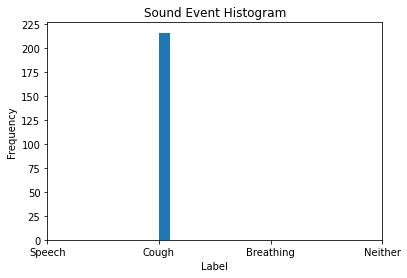

Negative samples: 191
Positives samples: 25
Recovered samples 0


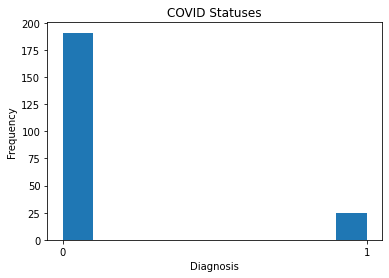

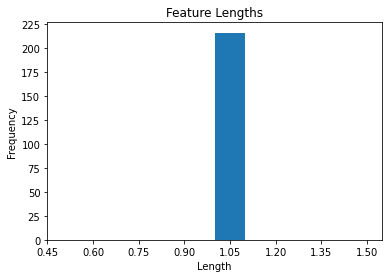

205 data rows were padded


In [65]:
testfeatures1, testcovidlabels1, testsoundlabels1 = load_data(file_name = 'DiCOVA/val1_baseline_features.mat', samples_needed = 5000,  train0_test1 = 1, fold = 1)

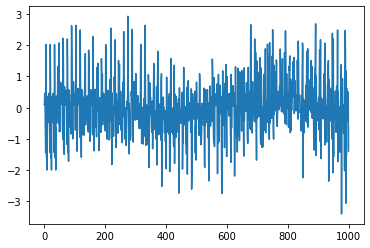

In [48]:
plt.plot(trainfeatures[0])

# Second Approach To Segment Celeb Data

0.029236316680908203 secs to fit LDA
lda_transformed shape: (216, 2)


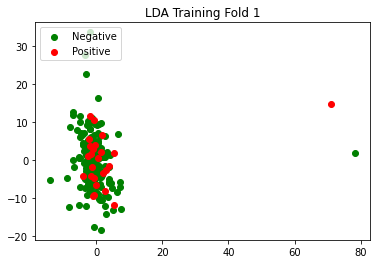

In [49]:
# lda = LDA(n_components=2)
pca = PCA(n_components=2)

# trainX = trainfeatures
# trainy = traincovidlabels

trainX = testfeatures1
trainy = testcovidlabels1
# trainy[0] = 2
######### FIT ##################
start_time = time.time()

# lda_transformed = pd.DataFrame(lda.fit_transform(trainX, trainy))
lda_transformed = pd.DataFrame(pca.fit_transform(trainX, trainy))

end_time = time.time()
time_lda = end_time-start_time
print(time_lda, 'secs to fit LDA')
print('lda_transformed shape:', lda_transformed.shape)
######################################

# Plot all three series (TRAINING DATA)
plt.scatter(lda_transformed[trainy==0][0], lda_transformed[trainy==0][1], label='Negative', c='green')
plt.scatter(lda_transformed[trainy==1][0], lda_transformed[trainy==1][1], label='Positive', c='red')

# Display legend and show plot
plt.legend(loc=2)
plt.title('LDA Training Fold 1')
plt.show()

In [26]:
# params1
bestModel = {'alpha': .001, 'loss': 'log', 'n_jobs': -1, 'penalty': 'l1'}
sgd = linear_model.SGDClassifier(alpha=bestModel['alpha'], loss = bestModel['loss'], penalty=bestModel['penalty'], shuffle = True, class_weight={0:.02, 1: .98})
dtree = DecisionTreeClassifier(max_depth=100, class_weight={0:.025, 1: .975})
kn = KNeighborsClassifier(n_neighbors=10)
svc = SVC(gamma=.0001, kernel='rbf', probability=True, class_weight={0:.05, 1: .95})
rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1, class_weight={0:.03, 1: .97})
nb = GaussianNB()
max_iter = 10000
alpha = .0001
MLP = MLPClassifier(alpha= alpha, max_iter= max_iter)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000000, class_weight={0:.08, 1: .92})

In [68]:
#### params2
dtree = DecisionTreeClassifier(max_depth=100, class_weight={0:.01, 1: .99})
kn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(gamma=.0001, kernel='rbf', probability=True, class_weight={0:.01, 1: .99})
rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1, class_weight={0:.001, 1: .999})
nb = GaussianNB()
max_iter = 100000
alpha = .00001
MLP = MLPClassifier(alpha= alpha, max_iter= max_iter)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000000, class_weight={0:.001, 1: .999})

In [50]:
# params3
dtree = DecisionTreeClassifier(max_depth=100, class_weight={0:0.2, 1: .8})
kn = KNeighborsClassifier(n_neighbors=7)
svc = SVC(gamma=.0001, kernel='rbf', probability=True, class_weight={0:.1, 1: .9})
rf = RandomForestClassifier(max_depth=10, n_estimators=10, max_features=1, class_weight={0:.02, 1: .98})
nb = GaussianNB()
max_iter = 50000
alpha = .0005
MLP = MLPClassifier(alpha= alpha, max_iter= max_iter)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000000, class_weight={0:.35, 1: .65})

In [51]:
acc_score = []
auc_score = []
all_truths = []
all_predictions = []
total_truths = []
total_predictions = []
total_auc_score = []
total_acc_score = []
clf = ['logreg', 'MLP', 'dtree', 'rf', 'nb', 'kn']
# clf = ['logreg', 'MLP', 'sgd', 'dtree', 'rf', 'nb', 'kn']

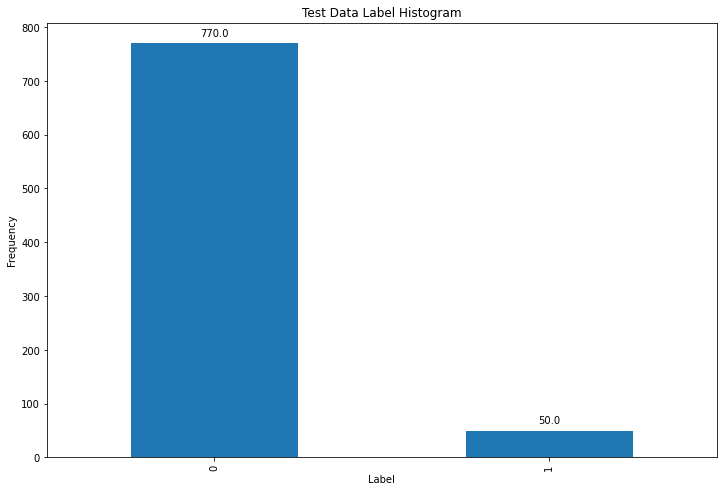

In [55]:
frequencies = [np.argwhere(testcovidlabels1 == 0).shape[0], np.argwhere(testcovidlabels1 == 1).shape[0]]
frequencies = [np.argwhere(traincovidlabels == 0).shape[0], np.argwhere(traincovidlabels == 1).shape[0]]
freq_series = pd.Series(frequencies)
x_labels = [0, 1]
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Test Data Label Histogram')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

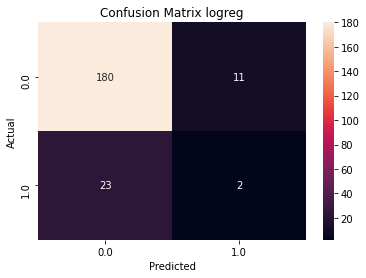

Average fit time: 0.0 secs
AUC: 0.5112041884816754


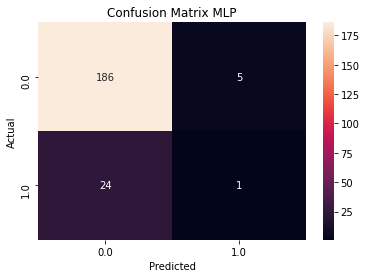

Average fit time: 0.0 secs
AUC: 0.5069109947643979


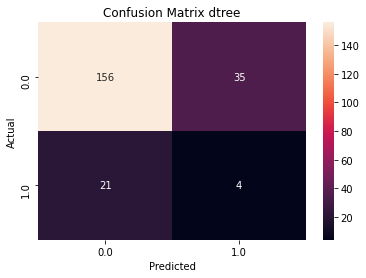

Average fit time: 0.0 secs
AUC: 0.4883769633507853


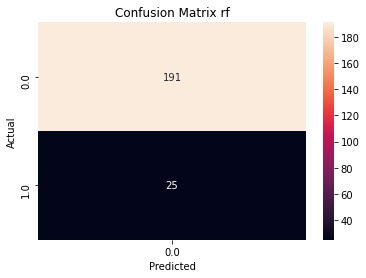

Average fit time: 0.0 secs
AUC: 0.5


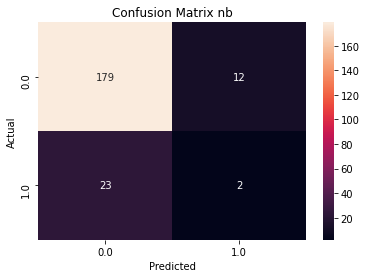

Average fit time: 0.0 secs
AUC: 0.5085863874345551


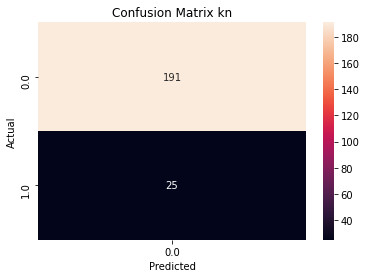

Average fit time: 0.0 secs
AUC: 0.5


In [53]:
for i in range(0, len(clf)):
  eval(clf[i]).fit(trainfeatures, traincovidlabels)
  preds = eval(clf[i]).predict(testfeatures1)
  conmat(testcovidlabels1, preds, 0, clf[i])
  fpr, tpr, thresholds = roc_curve(testcovidlabels1, preds)
  print("AUC:", metrics.auc(fpr, tpr))

In [66]:
d = {'Classifier' : clf}
df = pd.DataFrame(data=d, columns=['Classifier', 'AUC1', 'ACC1'])
print('***************************************************************************')
for clf_num in range (0, len(clf)):
  print(clf[clf_num])
  truths, predictions, time0 = celebLDA(eval(clf[clf_num]), trainfeatures, traincovidlabels, testfeatures1, testcovidlabels1, show_plots=0)
  # truths, predictions, time0 = celebLDA(eval(clf[clf_num]), X1, y1, testonly_features, testonly_covidlabels, show_plots=0)
  fpr, tpr, thresholds = roc_curve(truths, predictions)
  metrics.auc(fpr, tpr)
  df.loc[clf_num][1] = accuracy_score(truths, predictions)
  df.loc[clf_num][2] = metrics.auc(fpr, tpr)
  print("Accuracy: ", accuracy_score(truths, predictions))
  print("AUC:", metrics.auc(fpr, tpr))
print(df)

***************************************************************************
logreg
1.7 secs to fit
Correct Predictions: 173
Total Labels to Predict: 216
Accuracy:  0.8009259259259259
AUC: 0.5224083769633507
MLP
2.65 secs to fit
Correct Predictions: 173
Total Labels to Predict: 216
Accuracy:  0.8009259259259259
AUC: 0.5224083769633507
dtree
1.72 secs to fit
Correct Predictions: 168
Total Labels to Predict: 216
Accuracy:  0.7777777777777778
AUC: 0.5440837696335078
rf
1.72 secs to fit
Correct Predictions: 168
Total Labels to Predict: 216
Accuracy:  0.7777777777777778
AUC: 0.5440837696335078
nb
1.69 secs to fit
Correct Predictions: 162
Total Labels to Predict: 216
Accuracy:  0.75
AUC: 0.5283769633507853
kn
1.69 secs to fit
Correct Predictions: 168
Total Labels to Predict: 216
Accuracy:  0.7777777777777778
AUC: 0.5267015706806283
  Classifier      AUC1      ACC1
0     logreg  0.800926  0.522408
1        MLP  0.800926  0.522408
2      dtree  0.777778  0.544084
3         rf  0.777778  0.54408

In [ ]:
df

,Classifier,AUC1,ACC1,AUC2,ACC2,AUC3,ACC3,AUC4,ACC4,AUC5,ACC5,AUC6,ACC6,AUC7,ACC7
0,logreg,0.5,0.5,0.5,0.5,0.485714,0.485714,0.485714,0.485714,0.471429,0.471429,0.485714,0.485714,0.528571,0.528571
1,MLP,0.514286,0.514286,0.6,0.6,0.5,0.5,0.528571,0.528571,0.571429,0.571429,0.528571,0.528571,0.542857,0.542857
2,dtree,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.571429,0.571429,0.5,0.5
3,rf,0.5,0.5,0.514286,0.514286,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,nb,0.557143,0.557143,0.514286,0.514286,0.528571,0.528571,0.528571,0.528571,0.528571,0.528571,0.514286,0.514286,0.528571,0.528571
5,kn,0.4,0.4,0.414286,0.414286,0.371429,0.371429,0.4,0.4,0.4,0.4,0.471429,0.471429,0.428571,0.428571


Epoch 1/50
26/26 [==============================] - 1s 5ms/step - loss: 1.1587 - accuracy: 0.7527
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.1722 - accuracy: 0.9536
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0734 - accuracy: 0.9854
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9930
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9995
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/50
26/26 [==============================] - 0s 4ms/step - loss: 6.8040e-04 - accuracy: 1.0000
Epoch 11/50
26/

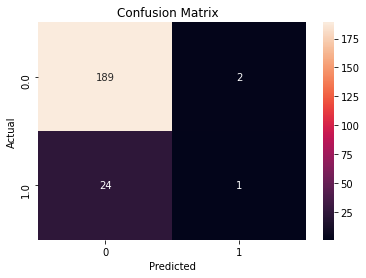

Average fit time: 0.0 secs
Classification Report


In [54]:
# X1, y1 = sampler(X1, y1, oversample = 1, undersample_num = undersample_nums[0])
# X1 = np.concatenate((X1, moretrain_features))
# X1 = np.concatenate((X1, the_rest))

# y1 = np.concatenate((y1.flatten(), moretrain_covidlabels))
# y1 = np.concatenate((y1, the_rest_c))
#Configure a TensorFlow Keras model
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(20, activation=tf.nn.softmax)])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training_images_data = trainfeatures
training_labels = traincovidlabels
model.fit(training_images_data, training_labels, epochs=50)
test_images_data = testfeatures1
test_labels = testcovidlabels1
print(model.evaluate(test_images_data, test_labels))
preds = model.predict(test_images_data)
preds = np.argmax(preds, axis=1)
from sklearn.metrics import multilabel_confusion_matrix
print('Confusion Matrix')
conmat(test_labels, preds.astype(int))
print('Classification Report')

In [ ]:
trainfeatures.shape

(5852, 95)

In [ ]:
d = {'Classifier' : clf}
df = pd.DataFrame(data=d, columns=['Classifier', 'AUC1', 'ACC1', 'AUC2', 'ACC2',
                                   'AUC3', 'ACC3', 'AUC4', 'ACC4', 'AUC5', 'ACC5',
                                   'AUC6', 'ACC6', 'AUC7', 'ACC7'])
colacc = 2
colauc = 1
for ex_row in range (0, 7):
  negs = np.argwhere(y1 == 0).shape[0]
  poss = np.argwhere(y1 == 1).shape[0]
  if oversample_nums[ex_row]*negs>= poss:
   X1, y1 = sampler(trainfeatures, traincovidlabels, oversample = 1, undersample_num = undersample_nums[ex_row], over_rate = oversample_nums[ex_row])
  else:
    X1, y1 = sampler(trainfeatures, traincovidlabels, oversample = 0, undersample_num = undersample_nums[ex_row])


  X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.1, random_state=1)
  
  print('Experiment Row', ex_row, 'Undersample Num:', undersample_nums[ex_row],
        'Oversample Num:', oversample_nums[ex_row])
  print('***************************************************************************')
  for clf_num in range (0, len(clf)):
    print(clf[clf_num])
    truths, predictions, time0 = quickclass(X_train, X_test, y_train, y_test, clf[clf_num])
    fpr, tpr, thresholds = roc_curve(truths, predictions)
    metrics.auc(fpr, tpr)
    df.loc[clf_num][colacc] = accuracy_score(truths, predictions)
    df.loc[clf_num][colauc] = metrics.auc(fpr, tpr)
    print("Accuracy: ", accuracy_score(truths, predictions))
    print("AUC:", metrics.auc(fpr, tpr))
  print(df)
  colauc += 2
  colacc += 2

Undersampling
Negative samples: 1200
Positives samples: 853
No Oversampling
Experiment Row 0 Undersample Num: 1200 Oversample Num: 0
***************************************************************************
logreg
Accuracy:  0.5970873786407767
AUC: 0.6136015325670499
MLP
Accuracy:  0.7475728155339806
AUC: 0.7372605363984674
dtree
Accuracy:  0.6407766990291263
AUC: 0.6362068965517242
rf
Accuracy:  0.4368932038834951
AUC: 0.5
nb
Accuracy:  0.5776699029126213
AUC: 0.5378352490421456
kn
Accuracy:  0.6504854368932039
AUC: 0.6448275862068966
  Classifier      AUC1      ACC1 AUC2 ACC2 AUC3  ... AUC5 ACC5 AUC6 ACC6 AUC7 ACC7
0     logreg  0.613602  0.597087  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
1        MLP  0.737261  0.747573  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2      dtree  0.636207  0.640777  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
3         rf       0.5  0.436893  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
4         nb  0.537835   0.57767  NaN  Na

In [ ]:
df

,Classifier,AUC1,ACC1,AUC2,ACC2,AUC3,ACC3,AUC4,ACC4,AUC5,ACC5,AUC6,ACC6,AUC7,ACC7
0,logreg,0.613602,0.597087,0.605191,0.595,0.596903,0.653846,0.626447,0.618333,0.529679,0.738342,0.642714,0.626,0.551307,0.861775
1,MLP,0.737261,0.747573,0.850166,0.85,0.623984,0.713287,0.930638,0.93,0.584124,0.756477,0.969209,0.968,0.689885,0.885666
2,dtree,0.636207,0.640777,0.746577,0.7475,0.608022,0.685315,0.821656,0.821667,0.551823,0.720207,0.873806,0.873,0.671184,0.853242
3,rf,0.5,0.436893,0.5,0.4825,0.507353,0.297203,0.509709,0.495,0.49538,0.217617,0.510377,0.481,0.504896,0.16041
4,nb,0.537835,0.57767,0.582839,0.59,0.520385,0.664336,0.660328,0.663333,0.521395,0.709845,0.650642,0.651,0.512492,0.74744
5,kn,0.644828,0.650485,0.681472,0.6725,0.642396,0.744755,0.700247,0.691667,0.582834,0.784974,0.762264,0.748,0.575964,0.866894


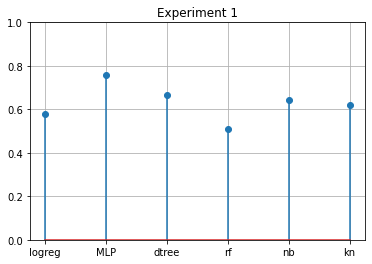

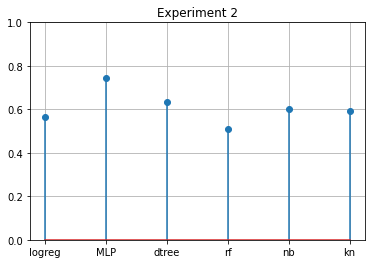

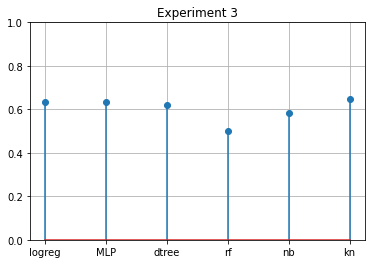

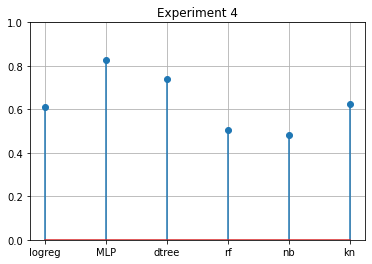

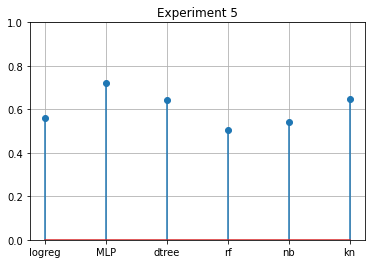

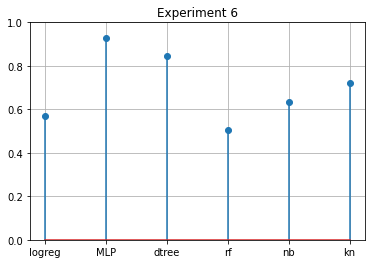

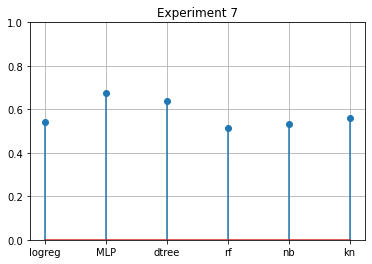

In [ ]:
# Plot the results
num = 1
for i in range (1, 15, 2):
  plt.figure()
  plt.stem(df['Classifier'], df.iloc[:,i])
  plt.title('Experiment ' + str(num))
  plt.ylim([0, 1])
  plt.grid(linestyle='-')
  num += 1

In [ ]:
#  df.to_csv('COVID_Detection_Celeb_Results_Shuffled_and_Mixed_Recs', index=False)

In [ ]:
 df.to_csv('COVID_Detection_Celeb_Results_quart_sec_coughs_minus_PLP_and_LPC_params1', index=False)

Double Check to make sure the results are reproducible

In [ ]:
best_clf = 'dtree'
runs = 10
all_times = np.zeros(10)
for i in range(runs):
  print(i)
  X1, y1 = sampler(trainfeatures, traincovidlabels, oversample = 1, undersample_num = undersample_nums[1], over_rate = oversample_nums[1])
  X1 = np.concatenate((X1, trainfeatures1))
  y1 = np.concatenate((y1.flatten(), traincovidlabels1))
  if i == 0:
    all_truths, all_preds, all_times[0] =  quickclass(X1,testfeatures, y1, testcovidlabels, best_clf)
  else:
    truths, preds, time1 = quickclass(X1,testfeatures, y1, testcovidlabels, best_clf)
    all_truths= np.concatenate((all_truths, truths))
    all_preds = np.concatenate((all_preds, preds))
    all_times[i] = time1

0
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
1
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
2
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
3
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
4
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
5
Undersam

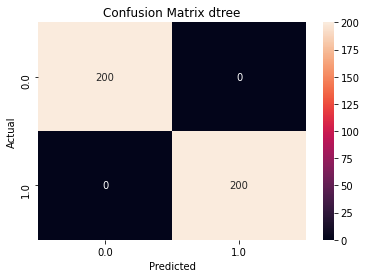

Average fit time: 0.5230039119720459 secs
AUC: 1.0


In [ ]:
conmat(all_truths, all_preds, all_times, name= best_clf)
fpr, tpr, thresholds = roc_curve(all_truths, all_preds)
print("AUC:", metrics.auc(fpr, tpr))

In [ ]:
all_times = np.zeros(10)
for i in range(runs):
  print(i)
  X1, y1 = sampler(trainfeatures, traincovidlabels, oversample = 1, undersample_num = undersample_nums[1], over_rate = oversample_nums[1])
  # X1 = np.concatenate((X1, trainfeatures1))
  # y1 = np.concatenate((y1.flatten(), traincovidlabels1))
  # X1 = np.concatenate((X1, testfeatures))
  # y1 = np.concatenate((y1.flatten(), testcovidlabels))
  X_train, X_test, y_train, y_test = train_test_split(
      X1, y1, test_size=0.05, random_state=1)
  if i == 0:
    all_truths, all_preds, all_times[0] =  quickclass(X_train, X_test, y_train, y_test, 'dtree')
  else:
    truths, preds, time1 = quickclass(X_train, X_test, y_train, y_test, 'dtree')
    all_truths= np.concatenate((all_truths, truths))
    all_preds = np.concatenate((all_preds, preds))
    all_times[i] = time1

0
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
1
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
2
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
3
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
4
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
5
Undersam

In [ ]:
conmat(all_truths, all_preds, all_times)
fpr, tpr, thresholds = roc_curve(all_truths, all_preds)
print("AUC:", metrics.auc(fpr, tpr))

NameError: ignored

CELEB TEST WITH LDA

In [ ]:
# undersample_nums = [1208, 2500, 2500, 2500, 3000, 3000, 5000, 5000] 
# oversample_nums = [    0,    0,  0.75,    1,  0.5,    1,  0.5,    1]
df = pd.DataFrame(data=d, columns=['Classifier', 'AUC1', 'ACC1', 'AUC2', 'ACC2',
                                   'AUC3', 'ACC3', 'AUC4', 'ACC4', 'AUC5', 'ACC5',
                                   'AUC6', 'ACC6', 'AUC7', 'ACC7'])
colacc = 2
colauc = 1
for ex_row in range (0, 7):
  X1, y1 = one_class(0, trainfeatures, traincovidlabels, trainsoundlabels)
  negs = np.argwhere(y1 == 0).shape[0]
  poss = np.argwhere(y1 == 1).shape[0]
  if oversample_nums[ex_row]*negs>= poss:
   X1, y1 = sampler(X1, y1, oversample = 1, undersample_num = undersample_nums[ex_row], over_rate = oversample_nums[ex_row])
  else:
    X1, y1 = sampler(X1, y1, oversample = 0, undersample_num = undersample_nums[ex_row])


  X1 = np.concatenate((X1, trainfeatures1))
  y1 = np.concatenate((y1.flatten(), traincovidlabels1))

  print('Experiment Row', ex_row, 'Undersample Num:', undersample_nums[ex_row],
        'Oversample Num:', oversample_nums[ex_row])
  print('***************************************************************************')
  for clf_num in range (0, len(clf)):
    print(clf[clf_num])
    truths, predictions, time0 = celebLDA(eval(clf[clf_num]), X1, y1, testfeatures, testcovidlabels, show_plots=0)
    fpr, tpr, thresholds = roc_curve(truths, predictions)
    metrics.auc(fpr, tpr)
    df.loc[clf_num][colacc] = accuracy_score(truths, predictions)
    df.loc[clf_num][colauc] = metrics.auc(fpr, tpr)
    print("Accuracy: ", accuracy_score(truths, predictions))
    print("AUC:", metrics.auc(fpr, tpr))
  print(df)
  colauc += 2
  colacc += 2

Undersampling
Negative samples: 900
Positives samples: 853
No Oversampling
Experiment Row 0 Undersample Num: 900 Oversample Num: 0
***************************************************************************
logreg
0.05 secs to fit
Correct Predictions: 19
Total Labels to Predict: 40
Accuracy:  0.475
AUC: 0.47500000000000003
MLP
0.54 secs to fit
Correct Predictions: 17
Total Labels to Predict: 40
Accuracy:  0.425
AUC: 0.42499999999999993
dtree
0.08 secs to fit
Correct Predictions: 19
Total Labels to Predict: 40
Accuracy:  0.475
AUC: 0.475
rf
0.14 secs to fit
Correct Predictions: 20
Total Labels to Predict: 40
Accuracy:  0.5
AUC: 0.5
nb
0.07 secs to fit
Correct Predictions: 17
Total Labels to Predict: 40
Accuracy:  0.425
AUC: 0.42499999999999993
kn
0.07 secs to fit
Correct Predictions: 18
Total Labels to Predict: 40
Accuracy:  0.45
AUC: 0.45000000000000007
  Classifier   AUC1   ACC1 AUC2 ACC2 AUC3  ... AUC5 ACC5 AUC6 ACC6 AUC7 ACC7
0     logreg  0.475  0.475  NaN  NaN  NaN  ...  NaN  NaN 

In [ ]:
df

,Classifier,AUC1,ACC1,AUC2,ACC2,AUC3,ACC3,AUC4,ACC4,AUC5,ACC5,AUC6,ACC6,AUC7,ACC7
0,logreg,0.475,0.475,0.55,0.55,0.575,0.575,0.575,0.575,0.45,0.45,0.5,0.5,0.475,0.475
1,MLP,0.425,0.425,0.45,0.45,0.45,0.45,0.475,0.475,0.475,0.475,0.45,0.45,0.475,0.475
2,dtree,0.475,0.475,0.5,0.5,0.475,0.475,0.6,0.6,0.6,0.6,0.575,0.575,0.55,0.55
3,rf,0.5,0.5,0.55,0.55,0.5,0.5,0.5,0.5,0.525,0.525,0.45,0.45,0.45,0.45
4,nb,0.425,0.425,0.45,0.45,0.425,0.425,0.5,0.5,0.475,0.475,0.525,0.525,0.5,0.5
5,kn,0.45,0.45,0.425,0.425,0.425,0.425,0.475,0.475,0.55,0.55,0.45,0.45,0.575,0.575


In [ ]:
runs = 10
all_times = np.zeros(10)
for i in range(runs):
  print(i)
  X1, y1 = sampler(trainfeatures, traincovidlabels, oversample = 1, undersample_num = undersample_nums[1], over_rate = oversample_nums[1])
  X1 = np.concatenate((X1, trainfeatures1))
  y1 = np.concatenate((y1.flatten(), traincovidlabels1))
  if i == 0:
    all_truths, all_preds, all_times[0] =  celebLDA(eval(clf[clf_num]), X1, y1, testfeatures, testcovidlabels, 'MLP')
  else:
    truths, preds, time1 = celebLDA(eval(clf[clf_num]), X1, y1, testfeatures, testcovidlabels, 'MLP')
    all_truths= np.concatenate((all_truths, truths))
    all_preds = np.concatenate((all_preds, preds))
    all_times[i] = time1

0
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
0.06 secs to fit
Correct Predictions: 21
Total Labels to Predict: 40
1
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
0.06 secs to fit
Correct Predictions: 17
Total Labels to Predict: 40
2
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
0.06 secs to fit
Correct Predictions: 21
Total Labels to Predict: 40
3
Undersampling
Negative samples: 1200
Positives samples: 853
X1 and y1 shapes:
(2053, 95) (2053, 1)
X2 and y2 shapes:
(2400, 95) (2400,)
Oversampling
Negative samples: 1200
Positives samples: 1200
0

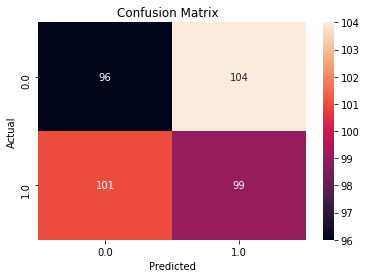

Average fit time: 0.058539390563964844 secs
AUC: 0.48750000000000004


In [ ]:
conmat(all_truths, all_preds, all_times)
fpr, tpr, thresholds = roc_curve(all_truths, all_preds)
print("AUC:", metrics.auc(fpr, tpr))

In [ ]:
 df.to_csv('COVID_Detection_Celeb_Results_less_features_with_LDA', index=False)

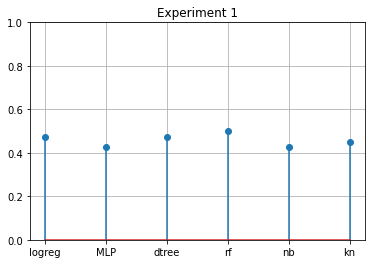

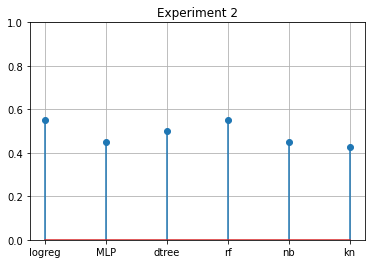

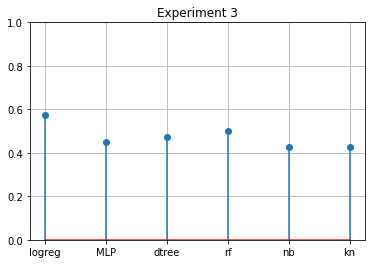

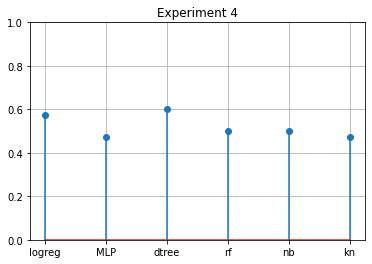

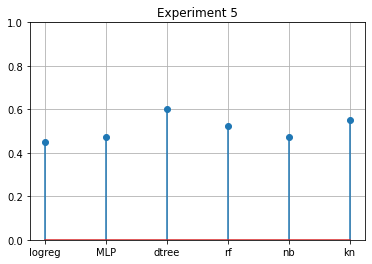

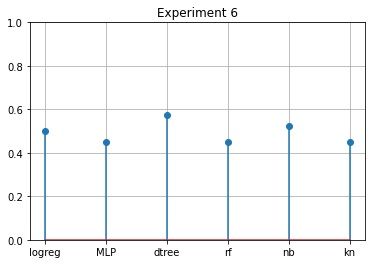

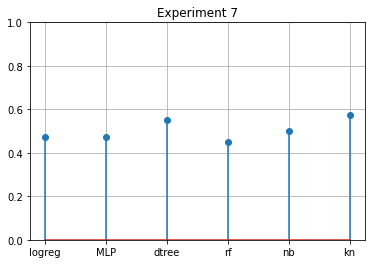

In [ ]:
# Plot the results
num = 1
for i in range (1, 15, 2):
  plt.figure()
  plt.stem(df['Classifier'], df.iloc[:,i])
  plt.title('Experiment ' + str(num))
  plt.ylim([0, 1])
  plt.grid(linestyle='-')
  num += 1

CELEB TEST WITH PCA AND LDA 

In [ ]:
df = pd.DataFrame(data=d, columns=['Classifier', 'AUC1', 'ACC1', 'AUC2', 'ACC2',
                                   'AUC3', 'ACC3', 'AUC4', 'ACC4', 'AUC5', 'ACC5',
                                   'AUC6', 'ACC6', 'AUC7', 'ACC7'])
colacc = 2
colauc = 1
for ex_row in range (0, 7):
  X1, y1 = one_class(0, trainfeatures, traincovidlabels, trainsoundlabels)
  negs = np.argwhere(y1 == 0).shape[0]
  poss = np.argwhere(y1 == 1).shape[0]
  if oversample_nums[ex_row]*negs>= poss:
   X1, y1 = sampler(X1, y1, oversample = 1, undersample_num = undersample_nums[ex_row], over_rate = oversample_nums[ex_row])
  else:
    X1, y1 = sampler(X1, y1, oversample = 0, undersample_num = undersample_nums[ex_row])


  X1 = np.concatenate((X1, trainfeatures1))
  y1 = np.concatenate((y1.flatten(), traincovidlabels1))

  print('Experiment Row', ex_row, 'Undersample Num:', undersample_nums[ex_row],
        'Oversample Num:', oversample_nums[ex_row])
  print('***************************************************************************')
  for clf_num in range (0, len(clf)):
    print(clf[clf_num])
    truths, predictions, time0 = celebPCALDA(eval(clf[clf_num]), X1, y1, testfeatures, testcovidlabels, show_plots=0)
    fpr, tpr, thresholds = roc_curve(truths, predictions)
    metrics.auc(fpr, tpr)
    df.loc[clf_num][colacc] = accuracy_score(truths, predictions)
    df.loc[clf_num][colauc] = metrics.auc(fpr, tpr)
    print("Accuracy: ", accuracy_score(truths, predictions))
    print("AUC:", metrics.auc(fpr, tpr))
  print(df)
  colauc += 2
  colacc += 2

Undersampling
Negative samples: 900
Positives samples: 853
No Oversampling
Experiment Row 0 Undersample Num: 900 Oversample Num: 0
***************************************************************************
logreg
0.03 secs to fit
Correct Predictions: 20
Total Labels to Predict: 40
Accuracy:  0.5
AUC: 0.5
MLP
0.45 secs to fit
Correct Predictions: 20
Total Labels to Predict: 40
Accuracy:  0.5
AUC: 0.5
dtree
0.03 secs to fit
Correct Predictions: 14
Total Labels to Predict: 40
Accuracy:  0.35
AUC: 0.35
rf
0.08 secs to fit
Correct Predictions: 20
Total Labels to Predict: 40
Accuracy:  0.5
AUC: 0.5
nb
0.02 secs to fit
Correct Predictions: 19
Total Labels to Predict: 40
Accuracy:  0.475
AUC: 0.475
kn
0.02 secs to fit
Correct Predictions: 15
Total Labels to Predict: 40
Accuracy:  0.375
AUC: 0.375
  Classifier   AUC1   ACC1 AUC2 ACC2 AUC3  ... AUC5 ACC5 AUC6 ACC6 AUC7 ACC7
0     logreg    0.5    0.5  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
1        MLP    0.5    0.5  NaN  NaN  NaN  ..

In [ ]:
df

,Classifier,AUC1,ACC1,AUC2,ACC2,AUC3,ACC3,AUC4,ACC4,AUC5,ACC5,AUC6,ACC6,AUC7,ACC7
0,logreg,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.575,0.575,0.5,0.5,0.625,0.625
1,MLP,0.5,0.5,0.5,0.5,0.525,0.525,0.625,0.625,0.575,0.575,0.475,0.475,0.575,0.575
2,dtree,0.35,0.35,0.45,0.45,0.525,0.525,0.325,0.325,0.475,0.475,0.45,0.45,0.55,0.55
3,rf,0.5,0.5,0.5,0.5,0.525,0.525,0.5,0.5,0.5,0.5,0.525,0.525,0.5,0.5
4,nb,0.475,0.475,0.45,0.45,0.525,0.525,0.45,0.45,0.525,0.525,0.5,0.5,0.525,0.525
5,kn,0.375,0.375,0.4,0.4,0.525,0.525,0.525,0.525,0.525,0.525,0.45,0.45,0.55,0.55


In [ ]:
 df.to_csv('COVID_Detection_Celeb_Results_less_features_with_PCA_and_LDA', index=False)

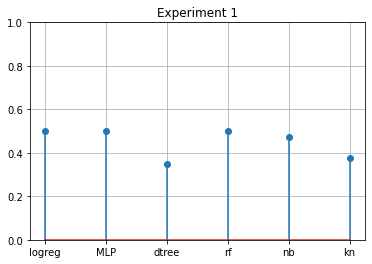

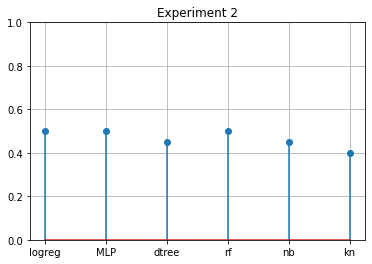

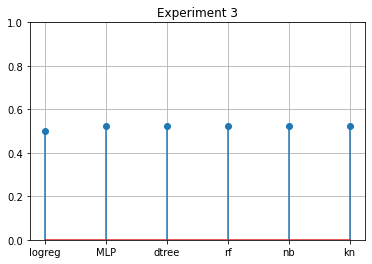

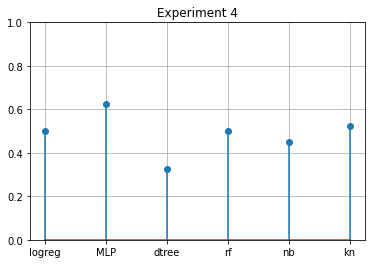

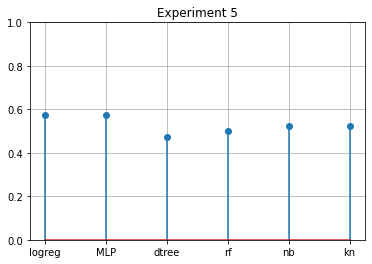

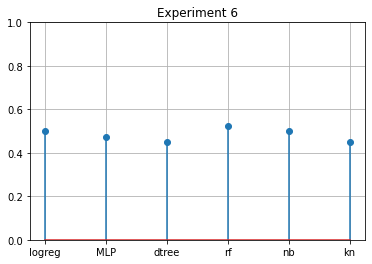

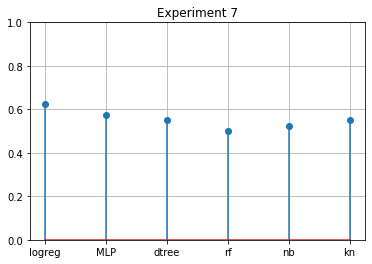

In [ ]:
# Plot the results
num = 1
for i in range (1, 15, 2):
  plt.figure()
  plt.stem(df['Classifier'], df.iloc[:,i])
  plt.title('Experiment ' + str(num))
  plt.ylim([0, 1])
  plt.grid(linestyle='-')
  num += 1

COSWARA 10% SPLIT FOR TESTING

In [ ]:
# undersample_nums = [1208, 2500, 2500, 2500, 3000, 3000, 5000, 5000] 
# oversample_nums = [    0,    0,  0.75,    1,  0.5,    1,  0.5,    1]

d = {'Classifier' : clf}
df_test = pd.DataFrame(data=d, columns=['Classifier', 'AUC1', 'ACC1', 'AUC2', 'ACC2',
                                   'AUC3', 'ACC3', 'AUC4', 'ACC4', 'AUC5', 'ACC5',
                                   'AUC6', 'ACC6', 'AUC7', 'ACC7', 'AUC8', 'ACC8'])
colacc = 2
colauc = 1
for ex_row in range (0, 8):
  X1, y1 = one_class(0, trainfeatures, traincovidlabels, trainsoundlabels)
  negs = np.argwhere(y1 == 0).shape[0]
  poss = np.argwhere(y1 == 1).shape[0]
  if oversample_nums[ex_row]*negs>= poss:
   X1, y1 = sampler(X1, y1, oversample = 1, undersample_num = undersample_nums[ex_row], over_rate = oversample_nums[ex_row])
  else:
    X1, y1 = sampler(X1, y1, oversample = 0, undersample_num = undersample_nums[ex_row])

  X_train, X_test, y_train, y_test = train_test_split(
    X1, y1, test_size=0.1, random_state=1)
  print('Experiment Row', ex_row, 'Undersample Num:', undersample_nums[ex_row],
        'Oversample Num:', oversample_nums[ex_row])
  print('***************************************************************************')
  for clf_num in range (0, len(clf)):
    print('Classifier:', clf[clf_num])
    eval(clf[clf_num]).fit(X_train, y_train)
    predictions = eval(clf[clf_num]).predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    metrics.auc(fpr, tpr)
    df_test.loc[clf_num][colacc] = accuracy_score(y_test, predictions)
    df_test.loc[clf_num][colauc] = metrics.auc(fpr, tpr)
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print("AUC:", metrics.auc(fpr, tpr))
  print(df_test)
  colauc += 2
  colacc += 2
  

Undersampling
Negative samples: 900
Positives samples: 853
No Oversampling
Experiment Row 0 Undersample Num: 900 Oversample Num: 0
***************************************************************************
Classifier: logreg
Accuracy:  0.5625
AUC: 0.5788962300816167
Classifier: MLP
Accuracy:  0.7215909090909091
AUC: 0.719717579997409
Classifier: dtree
Accuracy:  0.6193181818181818
AUC: 0.6158181111542946
Classifier: rf
Accuracy:  0.4659090909090909
AUC: 0.4933281513149372
Classifier: nb
Accuracy:  0.5909090909090909
AUC: 0.5805156108304185
Classifier: kn
Accuracy:  0.6136363636363636
AUC: 0.614328280865397
  Classifier      AUC1      ACC1 AUC2 ACC2 AUC3  ... AUC6 ACC6 AUC7 ACC7 AUC8 ACC8
0     logreg  0.578896    0.5625  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
1        MLP  0.719718  0.721591  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
2      dtree  0.615818  0.619318  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN
3         rf  0.493328  0.465909  NaN  NaN  NaN  ... 

In [ ]:
df_test

,Classifier,AUC1,ACC1,AUC2,ACC2,AUC3,ACC3,AUC4,ACC4,AUC5,ACC5,AUC6,ACC6,AUC7,ACC7,AUC8,ACC8
0,logreg,0.578896,0.5625,0.574535,0.579167,0.576826,0.555133,0.601732,0.636667,0.611638,0.622222,0.600757,0.591667,0.659256,0.649333,0.622059,0.605
1,MLP,0.719718,0.721591,0.708391,0.708333,0.709819,0.714829,0.799513,0.8,0.79903,0.822222,0.914556,0.913333,0.92141,0.926667,0.953774,0.951
2,dtree,0.615818,0.619318,0.641845,0.641667,0.708241,0.714829,0.702652,0.703333,0.747414,0.775556,0.828229,0.828333,0.810901,0.834667,0.892774,0.894
3,rf,0.493328,0.465909,0.512712,0.520833,0.510345,0.460076,0.518939,0.576667,0.50722,0.366667,0.508091,0.493333,0.507261,0.366667,0.510377,0.481
4,nb,0.580516,0.590909,0.590511,0.5875,0.542694,0.562738,0.507846,0.483333,0.607328,0.66,0.619658,0.62,0.637967,0.677333,0.645042,0.648
5,kn,0.614328,0.613636,0.629758,0.633333,0.611894,0.60076,0.654762,0.683333,0.696875,0.668889,0.713292,0.705,0.790487,0.752,0.75825,0.744


In [ ]:
 df_test.to_csv('COVID_Detection_Results_minus_PLP_and_LPC_params1', index=False)

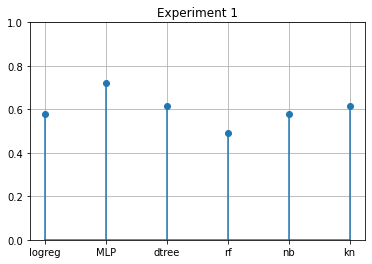

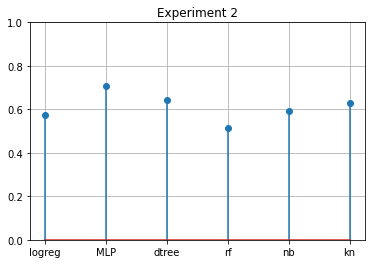

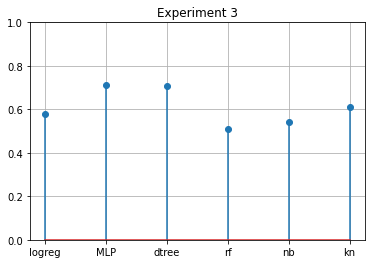

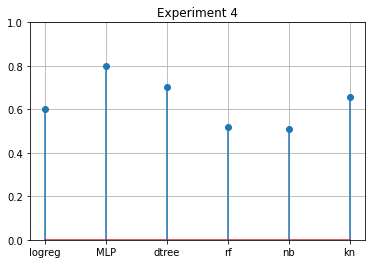

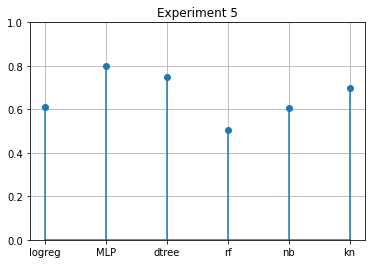

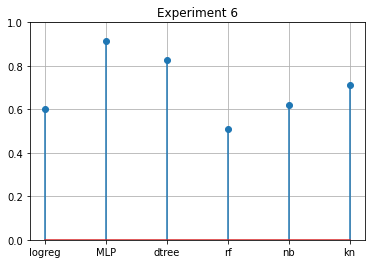

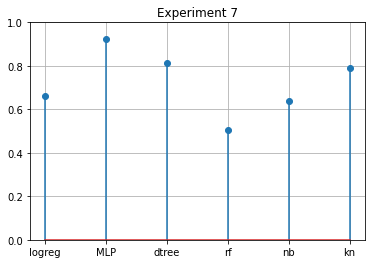

In [ ]:
# Plot the results
num = 1
for i in range (1, 15, 2):
  plt.figure()
  plt.stem(df_test['Classifier'], df_test.iloc[:,i])
  plt.title('Experiment ' + str(num))
  plt.ylim([0, 1])
  plt.grid(linestyle='-')
  num += 1